In [11]:
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
#Problem 1: 6.2
#from Exercise 6.1
from numpy import array,empty
A= array([[2,1,4,1],
          [3,4,-1,-1],
          [1,-4,1,5],
          [2,-2,1,3]], float)
v=array([-4,3,9,7], float)
N=len(v)

#Gaussian elimination 
for m in range(N):
    
    # Check if A[m,m] is the largest value from elements bellow and perform swapping
    for i in range(m+1,N):
        if A[m,m] < A[i,m]:
            A[[m,i],:] = A[[i,m],:]
            v[[m,i]] = v[[i,m]]
            
    #Divide by the diagonal element
    div = A[m,m]
    A[m,:] /= div
    v[m] /= div
    
    #Now subtract from the lower rows
    for i in range(m+1,N):
        mult = A[i,m]
        A[i,:] -= mult*A[m,:]
        v[i] -= mult*v[m]
        
    #Backsubstitution
    x = empty(N, float)
    for m in range(N-1,-1,-1):
        x[m] = v[m]
        for i in range(m+1,N):
            x[m]-=A[m,i]*x[i]
            
    print(x)

[-100.59259259   72.77777778  -18.66666667    5.        ]
[-118.08  101.56   27.2    21.8 ]
[ 1.86457371 -0.85441674 -2.01692829  1.19298246]
[ 2. -1. -2.  1.]


Problem 2a:
If mass is a heterogeneous set, then mass would be a matrix with index i, so $$\alpha_i = 2k - m_i \omega^2$$ So the Eq 6.56 would stay the same except $\alpha$ would become $\alpha_i$.

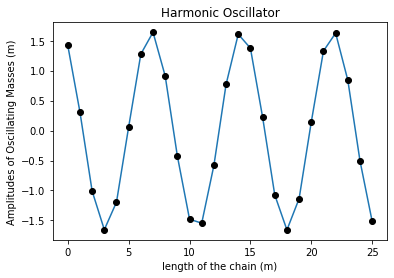

In [69]:
#Problem 2.b
# Constants
N = 26
C = 1.0
m = np.ones(N)

#In case of unequal masses, create an array containing the values here 

k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

#In case of damping, specify a damping constant $\gamma$ here, and alphs becomes: 
#alpha = np.complex(2*k-m*omega*omega,gamma*omega) 

# Set up the initial values of the arrays
A = np.zeros([N,N],float)
for i in range(N-1):
    
    # If you have unequal masses, the matrix A needs to be changed suitably 
    
    A[i,i] = alpha[i]
    A[i,i+1] = -k
    A[i+1,i] = -k
A[0,0] = alpha[i] - k
A[N-1,N-1] = alpha[i] - k

v = np.zeros(N,float)
v[0] = C

# Perform the Gaussian elimination
for i in range(N-1):

    # Divide row i by its diagonal element
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]

    # Now subtract it from the next row down
    A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]

# Divide the last element of v by the last diagonal element
v[N-1] /= A[N-1,N-1]

# Backsubstitution
x = np.empty(N,float)
x[N-1] = v[N-1]
for i in range(N-2,-1,-1):
    x[i] = v[i] - A[i,i+1]*x[i+1]
    
# If your matrix A is complex then you can find x using the following command. 
# x = np.matmul(np.linalg.inv(A), v)
# Refer to complex matrix.ipynb in the Recitation 7 repo    


# Make a plot using both dots and lines
plt.title("Harmonic Oscillator")
plt.plot(x)
plt.plot(x,"ko")
plt.xlabel("length of the chain (m)")
plt.ylabel("Amplitudes of Oscillating Masses (m)")
plt.show()

This is the classic form of a standing wave in a driven spatial system. This could be a model of what happens when vibrations are excited in atoms in a solid. Since it looks the same as the graph in the book, it gets the same results as the unaltered code because it still uses a uniform homogenous set of masses of 1.0.

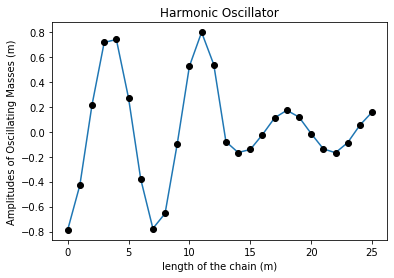

In [74]:
#Problem 2.c
# Constants
N = 26
C = 1.0
m = np.ones(N)
m[13]=10

#In case of unequal masses, create an array containing the values here 

k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

#In case of damping, specify a damping constant $\gamma$ here, and alphs becomes: 
#alpha = np.complex(2*k-m*omega*omega,gamma*omega) 

# Set up the initial values of the arrays
A = np.zeros([N,N],float)
for i in range(N-1):
    
    # If you have unequal masses, the matrix A needs to be changed suitably 
    
    A[i,i] = alpha[i]
    A[i,i+1] = -k
    A[i+1,i] = -k
A[0,0] = alpha[i] - k
A[N-1,N-1] = alpha[i] - k

v = np.zeros(N,float)
v[0] = C

# Perform the Gaussian elimination
for i in range(N-1):

    # Divide row i by its diagonal element
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]

    # Now subtract it from the next row down
    A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]

# Divide the last element of v by the last diagonal element
v[N-1] /= A[N-1,N-1]

# Backsubstitution
x = np.empty(N,float)
x[N-1] = v[N-1]
for i in range(N-2,-1,-1):
    x[i] = v[i] - A[i,i+1]*x[i+1]
    
# If your matrix A is complex then you can find x using the following command. 
# x = np.matmul(np.linalg.inv(A), v)
# Refer to complex matrix.ipynb in the Recitation 7 repo    


# Make a plot using both dots and lines
plt.title("Harmonic Oscillator")
plt.plot(x)
plt.plot(x,"ko")
plt.xlabel("length of the chain (m)")
plt.ylabel("Amplitudes of Oscillating Masses (m)")
plt.show()

This is the graph of the amplitudes with a large mass in the middle.

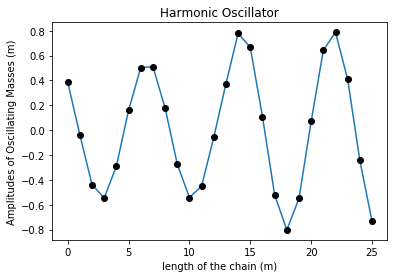

In [75]:
#Problem 2.d
# Constants
N = 26
C = 1.0
m = np.ones(N)
m[13]=0.1

#In case of unequal masses, create an array containing the values here 

k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

#In case of damping, specify a damping constant $\gamma$ here, and alphs becomes: 
#alpha = np.complex(2*k-m*omega*omega,gamma*omega) 

# Set up the initial values of the arrays
A = np.zeros([N,N],float)
for i in range(N-1):
    
    # If you have unequal masses, the matrix A needs to be changed suitably 
    
    A[i,i] = alpha[i]
    A[i,i+1] = -k
    A[i+1,i] = -k
A[0,0] = alpha[i] - k
A[N-1,N-1] = alpha[i] - k

v = np.zeros(N,float)
v[0] = C

# Perform the Gaussian elimination
for i in range(N-1):

    # Divide row i by its diagonal element
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]

    # Now subtract it from the next row down
    A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]

# Divide the last element of v by the last diagonal element
v[N-1] /= A[N-1,N-1]

# Backsubstitution
x = np.empty(N,float)
x[N-1] = v[N-1]
for i in range(N-2,-1,-1):
    x[i] = v[i] - A[i,i+1]*x[i+1]
    
# If your matrix A is complex then you can find x using the following command. 
# x = np.matmul(np.linalg.inv(A), v)
# Refer to complex matrix.ipynb in the Recitation 7 repo    


# Make a plot using both dots and lines
plt.plot(x)
plt.plot(x,"ko")
plt.title("Harmonic Oscillator")
plt.xlabel("length of the chain (m)")
plt.ylabel("Amplitudes of Oscillating Masses (m)")
plt.show()

This is the graph of the amplitudes with a small mass in the middle.

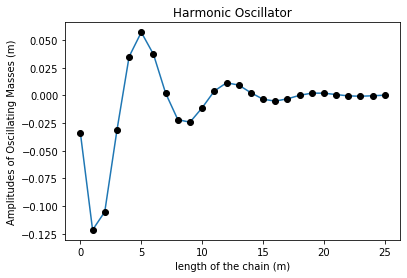

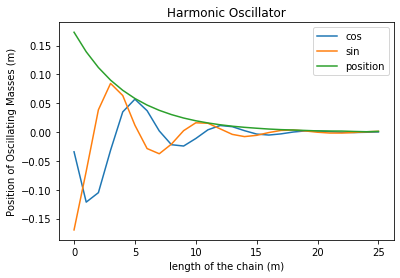

In [91]:
#Problem 3a
#Constants
N = 26
C = 1.0
m = 1.0
gamma = 1.0

#In case of unequal masses, create an array containing the values here 

k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

#In case of damping, specify a damping constant $\gamma$ here, and alpha becomes: 
alpha = np.complex(2*k-m*omega*omega,gamma*omega) 


# Set up the initial values of the arrays
A = np.zeros([N,N],complex)
for i in range(N-1):
    
    # If you have unequal masses, the matrix A needs to be changed suitably 
    
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k
    
A[0,0] = alpha - k
A[N-1,N-1] = alpha - k

v = np.zeros(N,float)
v[0] = C
    
# If your matrix A is complex then you can find x using the following command. 
x = np.matmul(np.linalg.inv(A), v)
# Refer to complex matrix.ipynb in the Recitation 7 repo    


# Make a plot using both dots and lines
plt.plot(x)
plt.plot(x,"ko")
plt.title("Harmonic Oscillator")
plt.xlabel("length of the chain (m)")
plt.ylabel("Amplitudes of Oscillating Masses (m)")
plt.show()
plt.plot(np.real(x),label='cos')
plt.plot(np.imag(x), label='sin')
plt.plot(np.sqrt(np.real(x)**2+np.imag(x)**2), label = 'position')
plt.title("Harmonic Oscillator")
plt.xlabel("length of the chain (m)")
plt.ylabel("Position of Oscillating Masses (m)")
plt.legend()
plt.show()

This is a damped harmonic oscillator, which is evident because the amplitude slowly decreases to 0. The second graph shows the position of the harmonic oscillator, the green curve. The position is made up of the cos and sin parts, which are the imaginary and real parts of the amplitude. 

Problem 3b: $x_i$ which is the amplitude in Newman's notation, is seen in green, which shows a decrease in position and then slowly reaching to 0, which makes sense because of the damping which stops the motion. As the amplitudes are high in either direction, the position is high and then as the amplitude dies off, so does the position. 

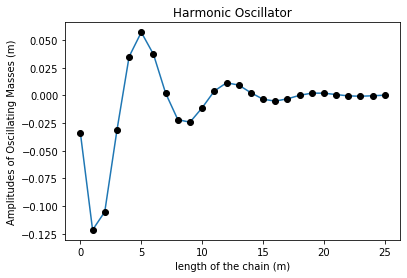

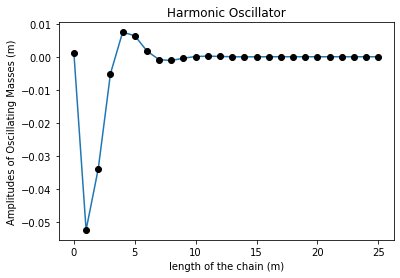

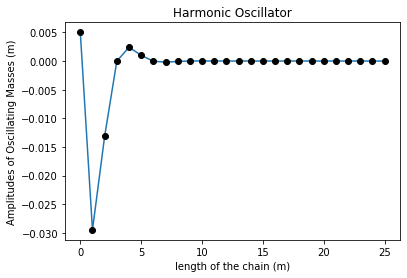

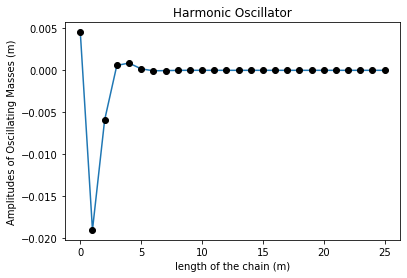

In [92]:
#Problem 3b
def thisfunc(gamma):
    # Constants
    N = 26
    C = 1.0
    m = 1.0

    #In case of unequal masses, create an array containing the values here 

    k = 6.0
    omega = 2.0
    alpha = 2*k-m*omega*omega

    #In case of damping, specify a damping constant $\gamma$ here, and alpha becomes: 
    alpha = np.complex(2*k-m*omega*omega,gamma*omega) 


    # Set up the initial values of the arrays
    A = np.zeros([N,N],complex)
    for i in range(N-1):
    
        # If you have unequal masses, the matrix A needs to be changed suitably 
    
        A[i,i] = alpha
        A[i,i+1] = -k
        A[i+1,i] = -k
    
    A[0,0] = alpha - k
    A[N-1,N-1] = alpha - k

    v = np.zeros(N,float)
    v[0] = C
    
    # If your matrix A is complex then you can find x using the following command. 
    x = np.matmul(np.linalg.inv(A), v)
    # Refer to complex matrix.ipynb in the Recitation 7 repo    
    return x

# Make a plot using both dots and lines
plt.plot(thisfunc(1.0))
plt.plot(thisfunc(1.0),"ko")
plt.title("Harmonic Oscillator")
plt.xlabel("length of the chain (m)")
plt.ylabel("Amplitudes of Oscillating Masses (m)")
plt.show()
plt.plot(thisfunc(3.0))
plt.plot(thisfunc(3.0),"ko")
plt.title("Harmonic Oscillator")
plt.xlabel("length of the chain (m)")
plt.ylabel("Amplitudes of Oscillating Masses (m)")
plt.show()
plt.plot(thisfunc(5.0))
plt.plot(thisfunc(5.0),"ko")
plt.title("Harmonic Oscillator")
plt.xlabel("length of the chain (m)")
plt.ylabel("Amplitudes of Oscillating Masses (m)")
plt.show()
plt.plot(thisfunc(7.0))
plt.plot(thisfunc(7.0),"ko")
plt.title("Harmonic Oscillator")
plt.xlabel("length of the chain (m)")
plt.ylabel("Amplitudes of Oscillating Masses (m)")
plt.show()

As $\gamma$ increases, the oscillator damps faster and faster, it is also a more dramatic switch to damping. The amplitude also gets smaller and smaller and it reaches 0 quicker. Because we are dissapating more. As $\gamma$ gets bigger, $x_i$ decreases.